<a href="https://colab.research.google.com/github/MaximTislenko/GB_med_stat_R/blob/main/%D0%94%D0%B8%D0%B0%D0%B3%D1%80_Start_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Начало работы с диаграммами

In [1]:
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
install.packages("mosaicData")
library(mosaicData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Создание диаграмм с помощью пакета ggplot2
Пакет `ggplot2` предлагает множество функций для построения диаграмм по слоям. Мы построим сложную диаграмму, начав с самого простого и добавляя элементы по одному. По умолчанию диаграммы `ggplot2` отображаются на сером фоне с белой координатной сеткой.

### ggplot

Первой функцией построения диаграмм является функция ggplot(). Она принимает следующие аргументы:
* таблицу с данными для построения диаграммы;
* набор переменных, определяющих визуальные свойства диаграммы. Набор переменных передается в функцию aes() (от англ. aesthetics – эстетика, т. е. что-то, что можно увидеть).

Следующий код создает диаграмму:

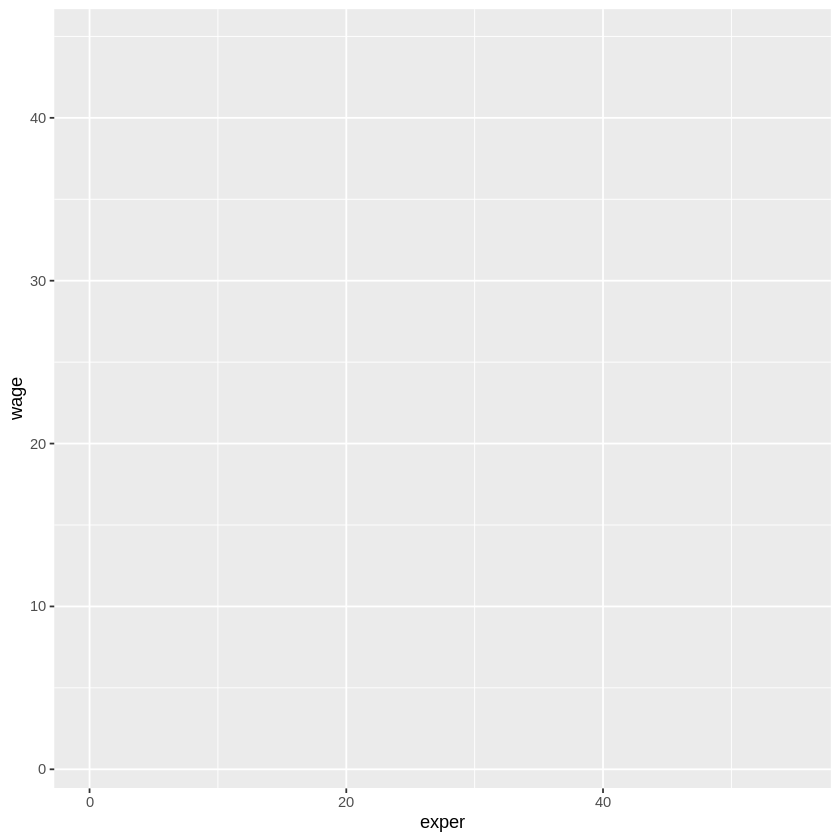

In [3]:
ggplot(data = CPS85, mapping = aes(x = exper, y = wage))

Почему диаграмма пустая? Мы указали, что переменная exper (опыт) должна отображаться на ось x, а переменная wage (размер заработной платы) – на ось y, но не указали, что именно хотим видеть на диаграмме. В данном случае нам нужны точки, представляющие каждую персону.

### Геометрические объекты

Геометрические объекты – это объекты (точки, линии, столбики и заштрихованные области), которые можно разместить на диаграмме. Они добавляются с помощью функций с именами, начинающимися с geom_. В настоящее время доступно 37 различных геометрических объектов, и этот список растет. В таблице описаны наиболее распространенные геометрические объекты, а также параметры соответствующих функций.

\begin{array}{r|l|l}
Функция & Добавляет & Параметры\\\hline
geom\_bar() & Столбиковую\ диаграмму & color, fill, alpha\\
geom\_boxplot() & Коробчатую\ диаграмму &color, fill, alpha, notch, width\\
geom\_density() & Диаграмму\ плотности & color, fill, alpha, linetype\\
geom\_histogram() & Гистограмму & color, fill, alpha, linetype, binwidth\\
geom\_hline() & Горизонтальные\ линии & color, alpha, linetype, size\\
geom\_jitter() & Точки\ со\ смещением & color, size, alpha, shape\\
geom\_line() & Линейный\ график & color, alpha, linetype, size\\
geom\_point() & Диаграмму\ рассеяния & color, alpha, shape, size\\
geom\_rug() & Ленточную\ диаграмму & color, side\\
geom\_smooth() & Аппроксимирующую\ линию & method, formula, color, fill, linetype, size\\
geom\_text() & Текстовую\ метку & Смотрите\ справку\ по\ этой\ функции\\
geom\_violin() & Скрипичную\ диаграмму & color, fill, alpha, linetype\\
geom\_vline() & Вертикальные\ линии & color, alpha, linetype, size
\end{array}

Добавим точки с помощью функции geom_point() и создадим диаграмму рассеяния. При определении диаграмм средствами `ggplot2` функции объединяются в цепочку с помощью знака `+`:


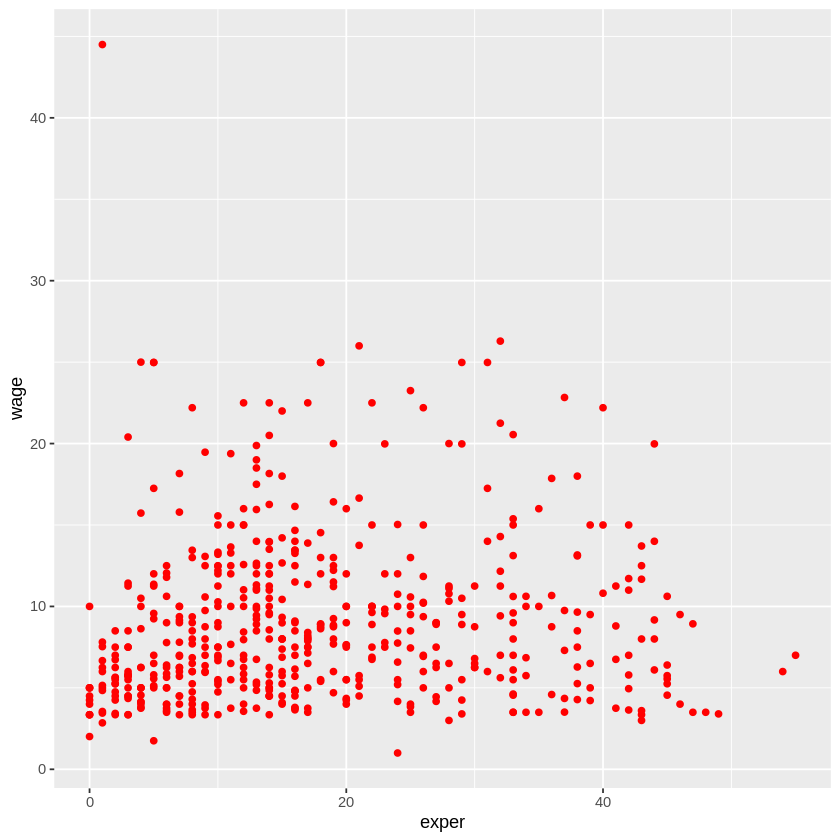

In [4]:
ggplot(data = CPS85, mapping = aes(x = exper, y = wage)) + geom_point(color='red')

Похоже, что с увеличением опыта увеличивается и заработная плата, но связь довольно слабая. На диаграмме также можно заметить выбросы. У одного человека заработная плата намного выше, чем у остальных. Удалим этот случай и воспроизведем диаграмму повторно:

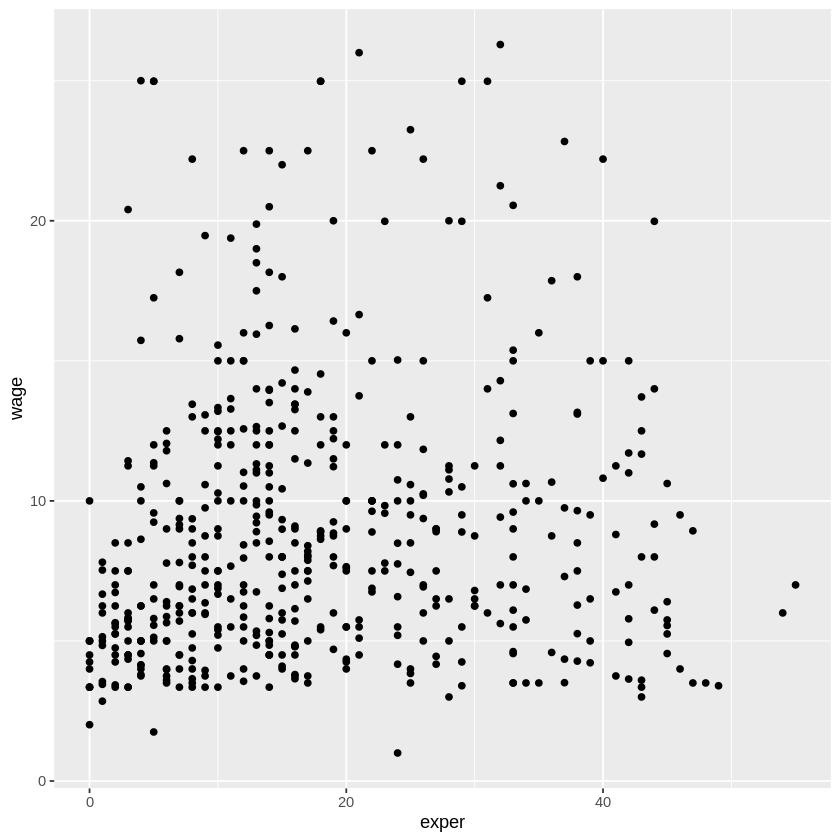

In [5]:
CPS85_01 <- CPS85[CPS85$wage < 40, ]
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage)) + geom_point()

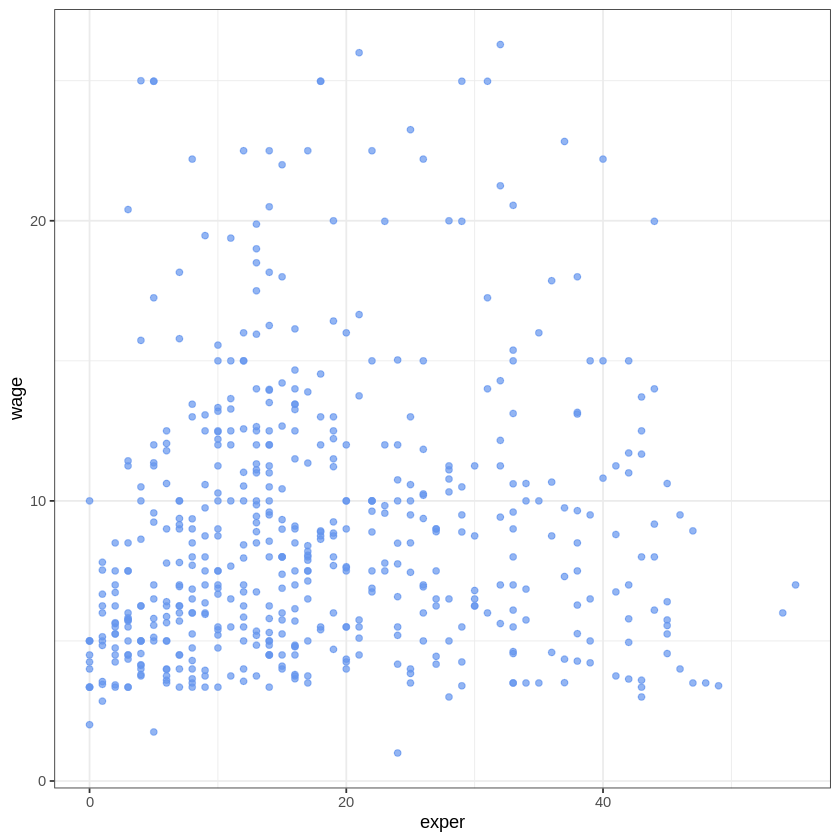

In [6]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage)) + geom_point(color = "cornflowerblue", alpha = .7, size = 1.5) + theme_bw()

Диаграмма действительно получилась чуть более привлекательной (по крайней мере, вы видите ее в цвете), но она никак не улучшает понимание данных. Было бы полезно увидеть на диаграмме линию, аппроксимирующую общую тенденцию зависимости размера заработной платы от опыта.

Добавить такую линию можно с помощью функции `geom_smooth()`. Она принимает параметры, определяющие тип (линейная, квадратичная, непараметрическая), толщину и цвет линии, а также необязательный доверительный интервал. Все эти параметры обсуждаются в главе 11. Здесь мы выводим линию линейной регрессии (`method = lm`, где `lm` означает linear model – линейная модель):

`geom_smooth()` using formula = 'y ~ x'


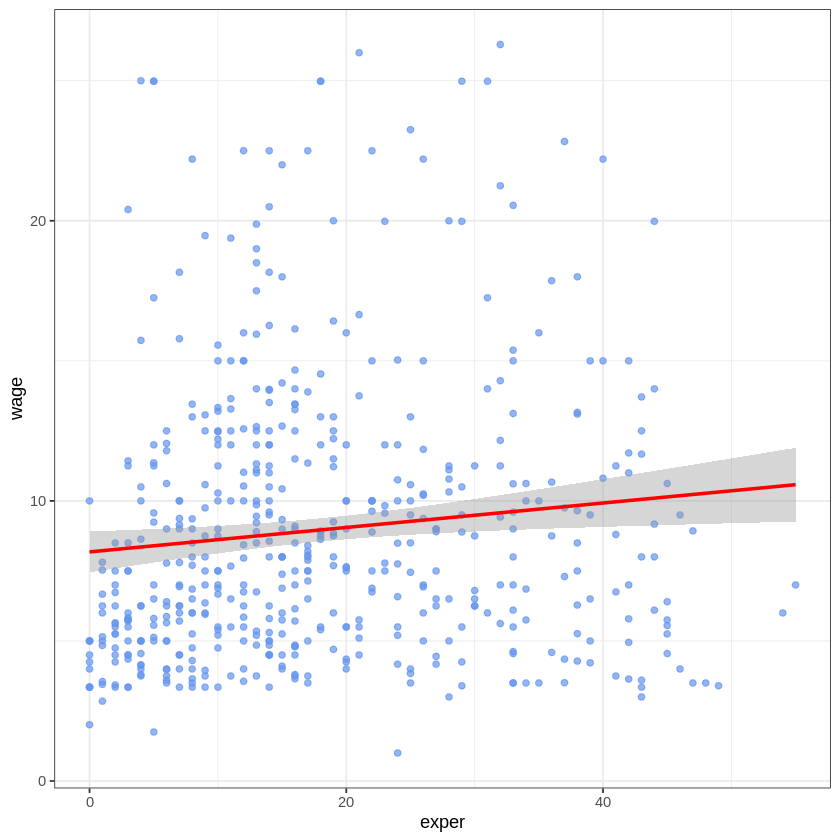

In [7]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage)) +
geom_point(color = "cornflowerblue", alpha = .7, size = 1.5) +
geom_smooth(method = "lm", color = 'red') +
theme_bw()

Судя по этой линии, средняя заработная плата несколько увеличивается с увеличением опыта. В этой главе используются только два геометрических объекта. Но в следующих главах мы используем многие другие и посмотрим, как с их помощью создавать самые разные диаграммы, столбиковые диаграммы, гистограммы, коробчатые диаграммы, графики плотности и др.

### Группировка
В предыдущем разделе мы настроили такие характеристики диаграммы, как цвет и прозрачность, используя постоянное значение. Однако цвет, форму, размер, прозрачность, стиль линий и другие визуальные характеристики можно поставить в зависимость от значений переменных. Это позволяет изображать группы наблюдений на одном графике (это называется группировкой).

Давайте добавим в диаграмму переменную sex и используем ее
для управления цветом, формой и типом линий:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


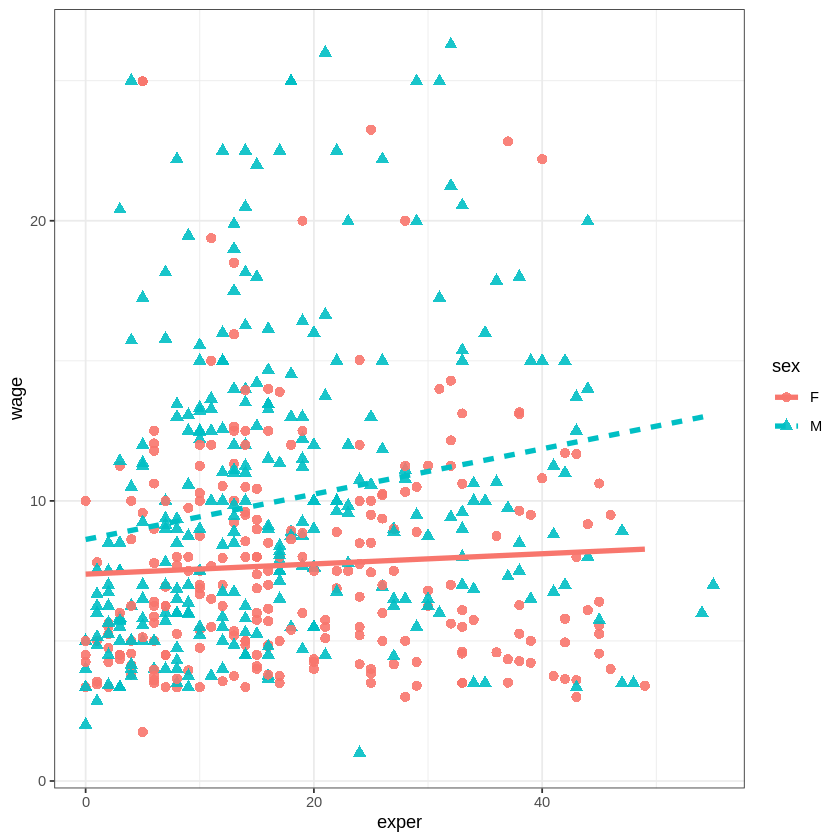

In [8]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage,
                                      color = sex, shape = sex, linetype = sex)) +
geom_point(alpha = .9, size = 2.5) +
geom_smooth(method = "lm", se = FALSE, size = 1.5) +
theme_bw()

По умолчанию первая группа (женщины) представлена кружками с розовой заливкой и сплошной розовой линией, а вторая группа (мужчины) – треугольниками с бирюзовой заливкой и пунктирной бирюзовой линией.

Обратите внимание, что параметры `color=sex`, `shape=sex`
и `linetype=sex` помещены в функцию `aes()`, потому что выбранная
нами переменная управляет эстетикой (внешним видом). Параметр `se = FALSE` в вызове `geom_smooth` был добавлен для подавления доверительных интервалов, что делает график не таким перегруженным и более удобным для восприятия. Параметр `size = 1.5`
немного увеличивает толщину линий.

Теперь отчетливо видно, что мужчины, как правило, зарабатывают больше, чем женщины (верхняя линия). Кроме того, связь опыта с размером заработной платы у мужчин явно более сильная (более крутая линия), чем у женщин.

### Масштабирование
Как мы видели, функция `aes()` используется для сопоставления переменных с визуальными характеристиками диаграммы. Масштабирование помогает определить, как отображаются данные. Например, ggplot2 автоматически создает оси графика с засечками, метками засечек и метками осей. Обычно он прекрасно справляется с этой задачей, но иногда бывает желательно подправить их внешний вид. Цвета, представляющие группы, выбираются автоматически, но при желании и в зависимости от ваших вкусов и требований к публикации можно выбрать другой набор цветов. Функции масштабирования (с именами, начинающимися
с `scale_`) позволяют изменить масштабирование по умолчанию.В таблице перечислены некоторые часто используемые функции масштабирования.



\begin{array}{r|l}
Функция & Описание \\\hline
scale\_x\_continouous(), & Масштабирует\ оси\ x\ и\ y\ для\  количественных\ переменных.\ Принимает\\
scale\_y\_continouous() & параметры, управляющие\ визуальным\ представлением\ засечек, меток\
и\ диапазоном\ отображаемых\ значений \\\hline
scale\_x\_discrite(), & То\ же, что\ и\ выше, \\
scale\_y\_discrite()&но\ для\ осей, представляющих\ категориальные\ переменные\\\hline
scale\_color_mannual() & Задает\ цвета\ для\ представления\ уровней\ категориальной\ переменной. Параметр\ values\ определяет\ цвета.\\
~&Таблицу\ цветов\ можно\ найти\ в\ http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf\\\hline
\end{array}

Давайте изменим масштабы осей x и y, а также цвета, представляющие мужчин и женщин. Для оси x, представляющей опыт (exper), зададим диапазон от 0 до 60 с шагом 10, а для оси y, представляющей размер заработной платы, зададим диапазон от 0 до 30 с шагом 5. Женщины будут представлены грязно-красным цветом, а мужчины – грязно-синим. Следующий код создает диаграмму:

`geom_smooth()` using formula = 'y ~ x'


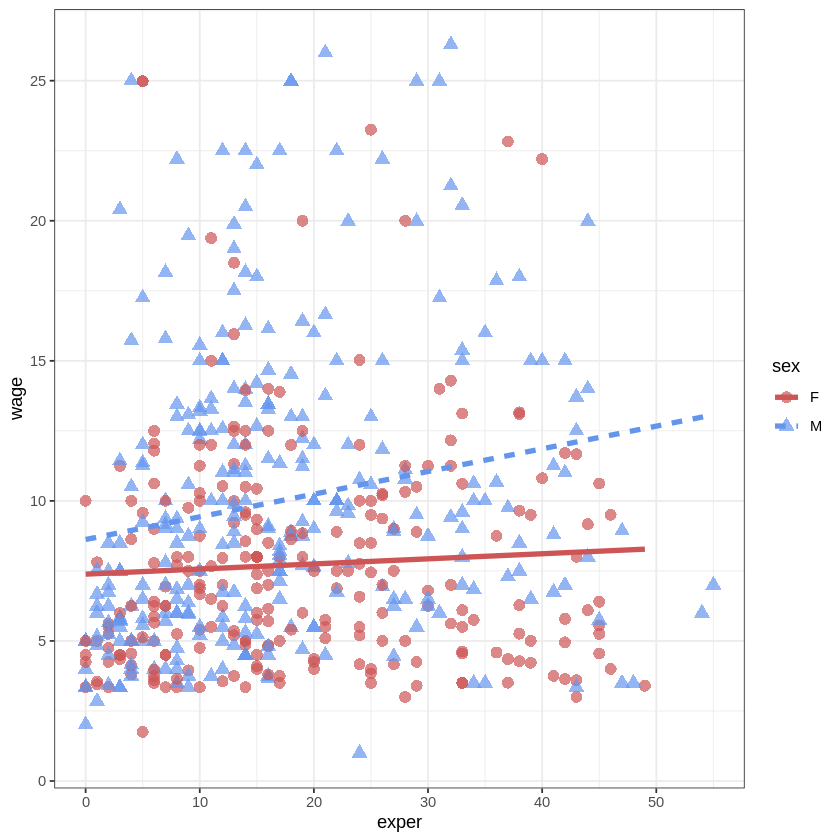

In [9]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage,
                                      color = sex, shape = sex, linetype = sex)) +
        geom_point(alpha = 0.7, size = 3) +
        geom_smooth(method = "lm", se = FALSE, size = 1.5) +
        scale_x_continuous(breaks = seq(0, 60, 10)) + # генерирует числовой вектор, начиная с 0 и заканчивая 60 с шагом 10
        scale_y_continuous(breaks = seq(0,30,5)) +     # генерирует числовой вектор, начиная с 0 и заканчивая 30 с шагом 5
        scale_color_manual(values = c("indianred3", "cornflowerblue")) +
      theme_bw()

Мы можем изменить метки на оси y, чтобы отметить этот факт, используя пакет scales, позволяющий форматировать метки и отображать метки, включающие знак доллара, евро, процента и т. д. Установите пакет scales (install.packages("scales")), а затем выполните следующий код:

`geom_smooth()` using formula = 'y ~ x'


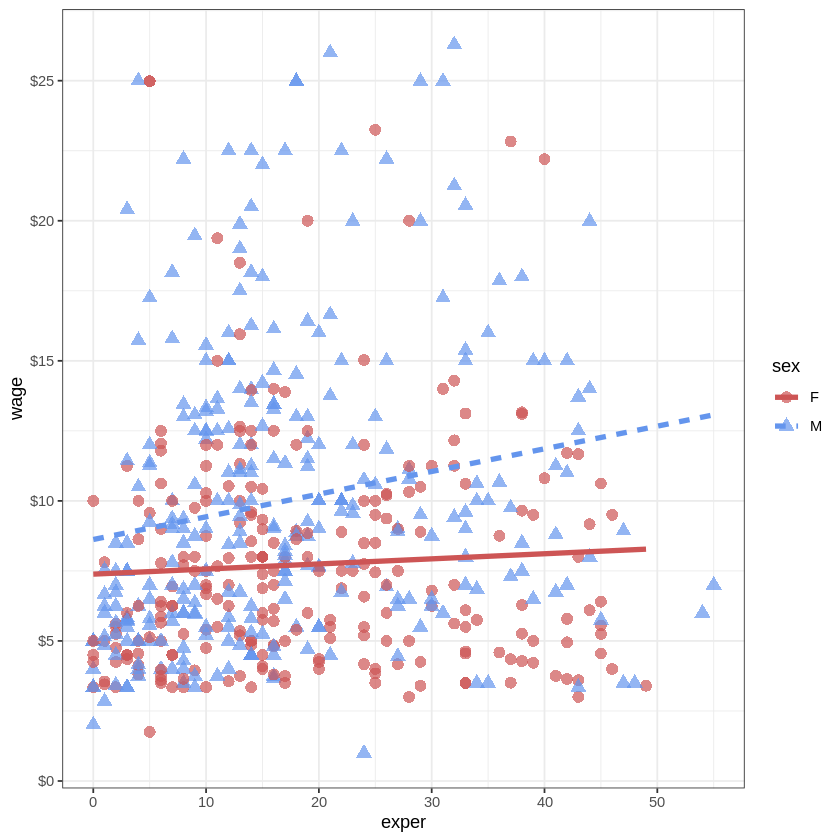

In [10]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage,
                                      color = sex, shape = sex, linetype = sex)) +
       geom_point(alpha = 0.7, size = 3) +
       geom_smooth(method = "lm", se = FALSE, size = 1.5) +
       scale_x_continuous(breaks = seq(0, 60, 10)) +
       scale_y_continuous(breaks = seq(0, 30, 5), label = scales::dollar) +
       scale_color_manual(values = c("indianred3", "cornflowerblue")) +
    theme_bw()

Мы неплохо продвинулись вперед. Теперь перейдем к следующему вопросу: различается ли связь между опытом и размером заработной платы для мужчин и женщин и для разных отраслей?
Давайте построим ту же диаграмму отдельно для каждой отрасли.

### Категоризованные диаграммы
Иногда взаимосвязи становятся более отчетливыми, если отобразить группы на параллельных диаграммах. Категоризованные диаграммы позволяют воспроизвести отдельный график для каждого значения заданной переменной (или их комбинации). Категоризованные диаграммы можно создавать с помощью функций `facet_wrap()` и `facet_grid()`. Их синтаксис приводится в таблице, где `var`, `rowvar` и `colvar` являются факторами.

\begin{array}{r|l}
Функция&Описание\\\hline
facet\_wrap(~var, ncol = n)&Создает~отдельную~диаграмму~для~каждого~значения~переменной~var, размещая~их~в~n~столбцах \\
~&~\\\hline
facet\_wrap(~var, nrow = n)&Создает~отдельную~диаграмму~для~каждого~значения~переменной~var, размещая~их~в~n~строках\\
~&~\\\hline
facet\_grid(rowvar~colvar)&Создает~отдельную~диаграмму~для~каждого~значения~комбинации~переменных~rowvar~и~colvar, \\
~&~где~rowvar~представляет~строки,
а~colvar – столбцы\\\hline
facet\_grid(rowvar~.)& Создает~отдельную~диаграмму~для~каждого~значения~переменной~rowvar~в~одном~столбце\\
~&~\\\hline
facet\_grid(.~colvar)&Создает~отдельную~диаграмму~для~каждого~значения~переменной~colvar~в~одной строке
\end{array}

`geom_smooth()` using formula = 'y ~ x'


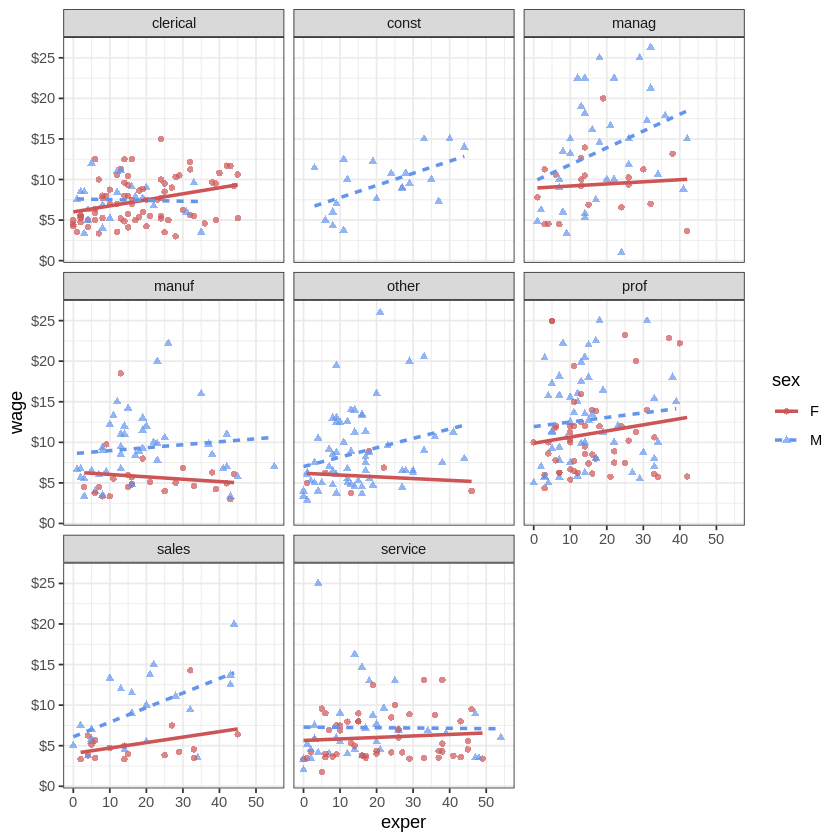

In [11]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage, color = sex, shape = sex, linetype = sex)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_x_continuous(breaks = seq(0,60,10)) +
  scale_y_continuous(breaks = seq(0,30,5), label = scales::dollar) +
  scale_color_manual(values = c("indianred3", "cornflowerblue")) +
  facet_wrap(~sector) +
  theme_bw()

Похоже, что различия между мужчинами и женщинами поразному проявляются в разных отраслях. Например, сильная положительная связь между опытом и заработной платой имеет место для менеджеров-мужчин, но не для менеджеров-женщин. В меньшей степени это верно и в торговле. По всей видимости, в сфере обслуживания заработная плата никак не зависит от опыта ни у мужчин, ни у женщин, однако мужчины зарабатывают немного больше. Заработная плата увеличивается с опытом у женщин-бухгалтеров, но может снижаться у мужчин (в данном случае зависимость может быть несущественной). На данный момент мы получили более глубокое понимание зависимости между опытом и размером заработной платы.

### Метки
Диаграммы должны легко интерпретироваться, и информативные
метки здорово помогают в этом. Функция `labs()` позволяет настроить метки для осей и легенд. Также с ее помощью можно добавить свой заголовок, подзаголовок и подпись внизу. Давайте добавим все эти метки, как показано ниже:

`geom_smooth()` using formula = 'y ~ x'


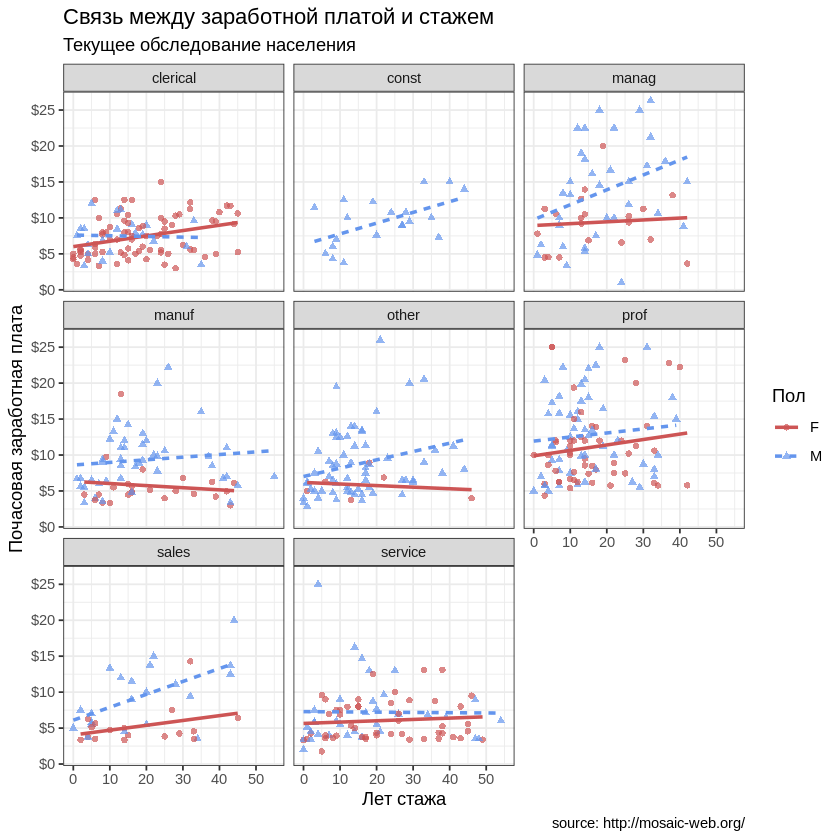

In [12]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage, color = sex, shape = sex, linetype = sex)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_x_continuous(breaks = seq(0,60,10)) +
  scale_y_continuous(breaks = seq(0,30,5), label = scales::dollar) +
  scale_color_manual(values = c("indianred3", "cornflowerblue")) +
  facet_wrap(~sector) +
  labs(title = "Связь между заработной платой и стажем",
        subtitle = "Текущее обследование населения",
        caption = "source: http://mosaic-web.org/",
        x = "Лет стажа",
        y = "Почасовая заработная плата",
        color = "Пол", shape = "Пол", linetype = "Пол") +
  theme_bw()

Теперь не нужно гадать, что означают метки `expr` и `wage` или откуда взяты данные.

### Темы
Наконец, внешний вид диаграммы можно точно настроить с помощью тем. Функции управления темами (с именами, начинающимися с `theme_`) позволяют задавать цвет фона, шрифта, линий сетки, размещение легенды и другое видимое содержимое диаграмм, не связанное с данными. Давайте использовать наиболее чистую тему. Мы использовали
тему с белым фоном и светло-серыми линиями сетки. Теперь попробуем другую тему, более минималистическую. Следующий код создает диаграмму, представленную ниже.

`geom_smooth()` using formula = 'y ~ x'


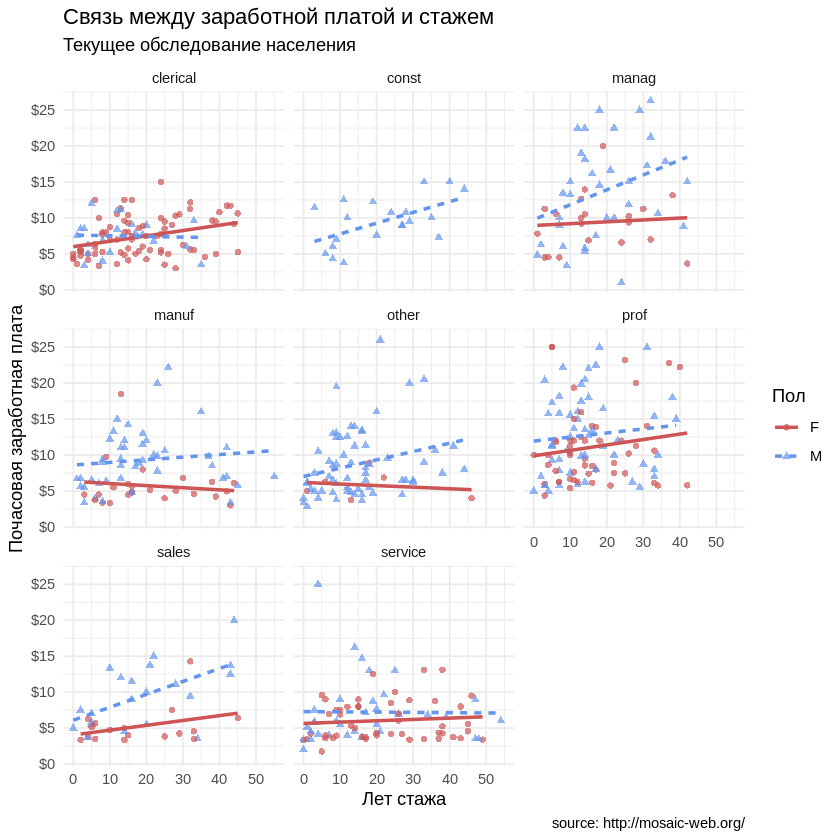

In [13]:
ggplot(data = CPS85_01, mapping = aes(x = exper, y = wage, color = sex, shape = sex, linetype = sex)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_x_continuous(breaks = seq(0,60,10)) +
  scale_y_continuous(breaks = seq(0,30,5), label = scales::dollar) +
  scale_color_manual(values = c("indianred3", "cornflowerblue")) +
  facet_wrap(~sector) +
  labs(title = "Связь между заработной платой и стажем",
        subtitle = "Текущее обследование населения",
        caption = "source: http://mosaic-web.org/",
        x = "Лет стажа",
        y = "Почасовая заработная плата",
        color = "Пол", shape = "Пол", linetype = "Пол") +
  theme_minimal()

## Особенности пакета ggplot2
Прежде чем закончить эту главу, необходимо рассмотреть три важных вопроса: применение функции `aes()`, работа с диаграммами ggplot2 как с объектами R и различные методы сохранения графиков для использования в отчетах и на веб-страницах.

### Параметры с данными и настройками визуального представления
Создание диаграмм с помощью ggplot2 всегда начинается с вызова функции `ggplot()`. В предыдущих примерах этой функции передавались параметры с данными и настройками визуального представления. В таком случае они применяются ко всем последующим вызовам функций geom.
Однако эти параметры можно передавать непосредственно в вызовы функций geom. В этом случае они применяются только к конкретному геометрическому объекту. Рассмотрим следующий фрагмент кода:

`geom_smooth()` using formula = 'y ~ x'


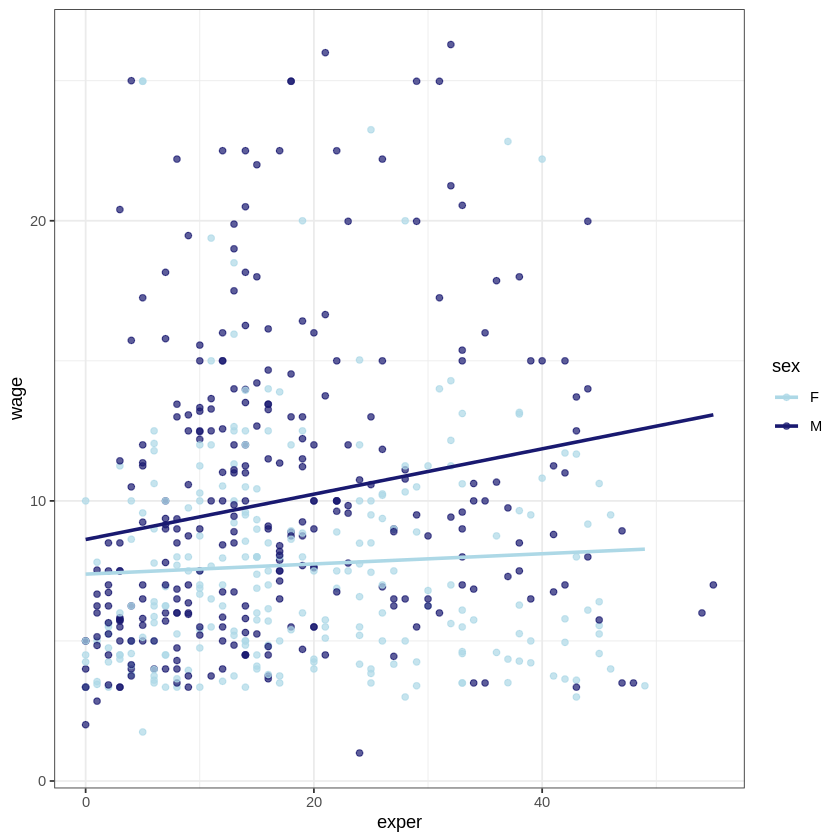

In [14]:
ggplot(CPS85_01, aes(x = exper, y = wage, color = sex)) +
geom_point(alpha = .7, size = 1.5) +
geom_smooth(method = "lm", se = FALSE, size = 1) +
scale_color_manual(values = c("lightblue", "midnightblue")) +
theme_bw()

Поскольку зависимость цвета от переменной sex определяет-
ся в функции `ggplot()`, она применяется также к вызовам обеих функций, `geom_point` и `geom_smooth`. Цвет точки указывает на пол, а кроме того, для мужчин и женщин создаются отдельные цветные аппроксимирующие линии, отражающие тренд. Вот другой фрагмент кода для сравнения:

`geom_smooth()` using formula = 'y ~ x'


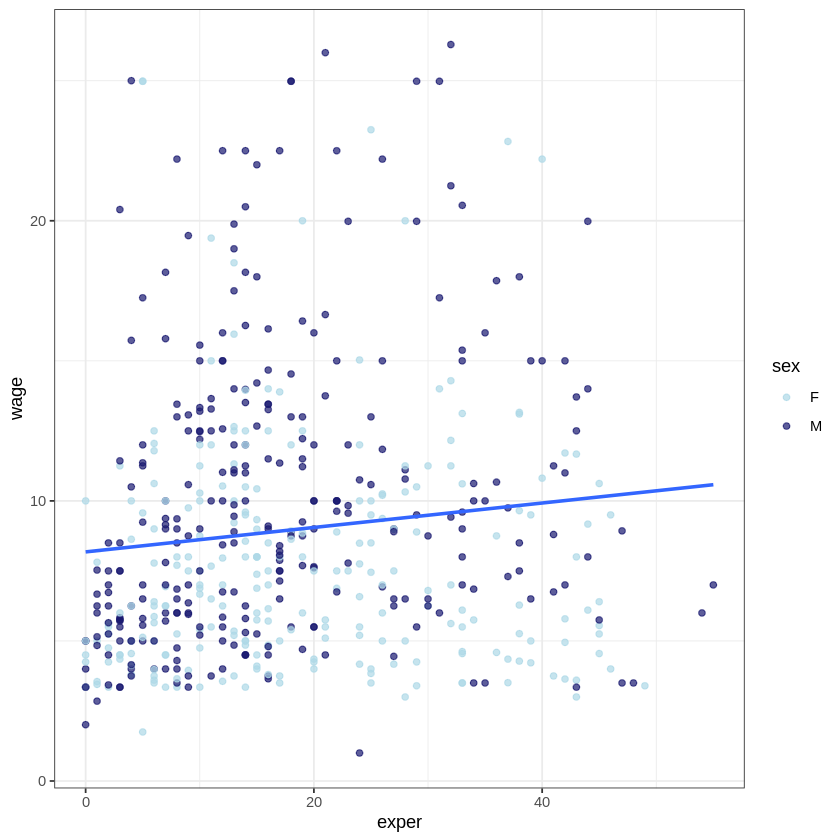

In [15]:
ggplot(CPS85_01, aes(x = exper, y = wage)) +
geom_point(aes(color = sex), alpha = .7, size = 1.5) +
geom_smooth(method = "lm", se = FALSE, size = 1) +
scale_color_manual(values = c("lightblue", "midnightblue")) +
theme_bw()

Поскольку зависимость цвета от пола задается только в функции `geom_point()`, она применяется лишь там, а `geom_smooth()` выводит единую для всех наблюдений линию аппроксимации.

В большинстве примеров в этой книге параметры с данными и настройками визуального представления помещаются в вызов функции ggplot(). Кроме того, имена `data=` и `mapping=` в большинстве случаев будут опускаться, потому что первый параметр всегда представляет данные, а второй – настройки визуального представления.

### Диаграммы как объекты
Диаграмму ggplot2 можно сохранить как именованный объект R (список), выполнить с ним некоторые операции, а затем распечатать или сохранить на диск.


In [18]:
# Подготовка данных.
data(CPS85 , package = "mosaicData")
CPS85 <- CPS85[CPS85$wage < 40,]

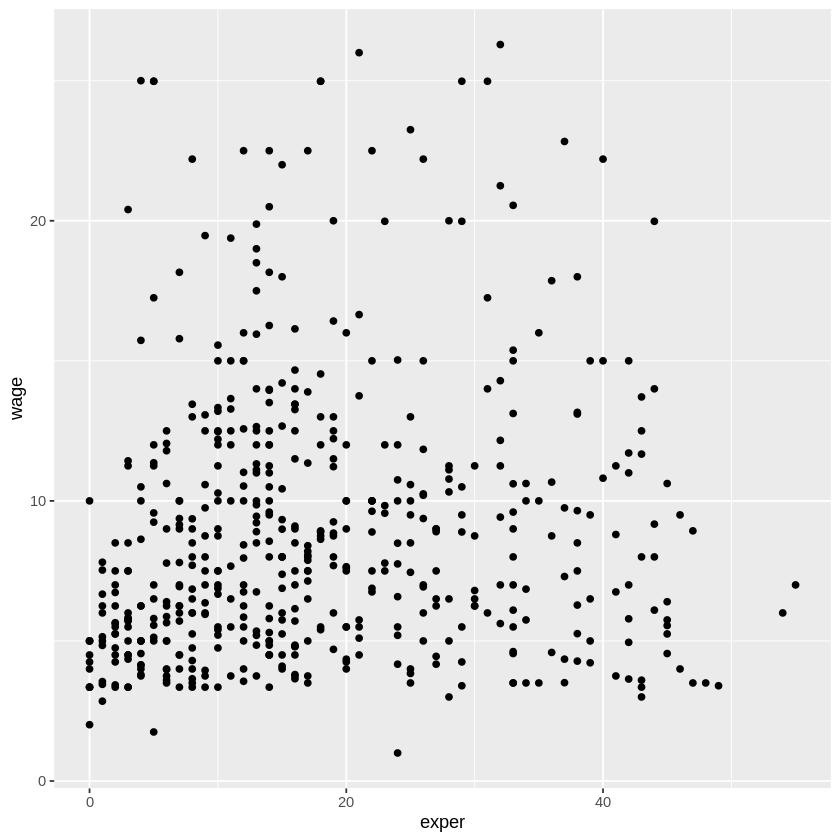

In [19]:
# Создание диаграммы рассеяния и сохранение в объекте myplot.
myplot <- ggplot(data = CPS85, aes(x = exper, y = wage)) +
geom_point()
myplot

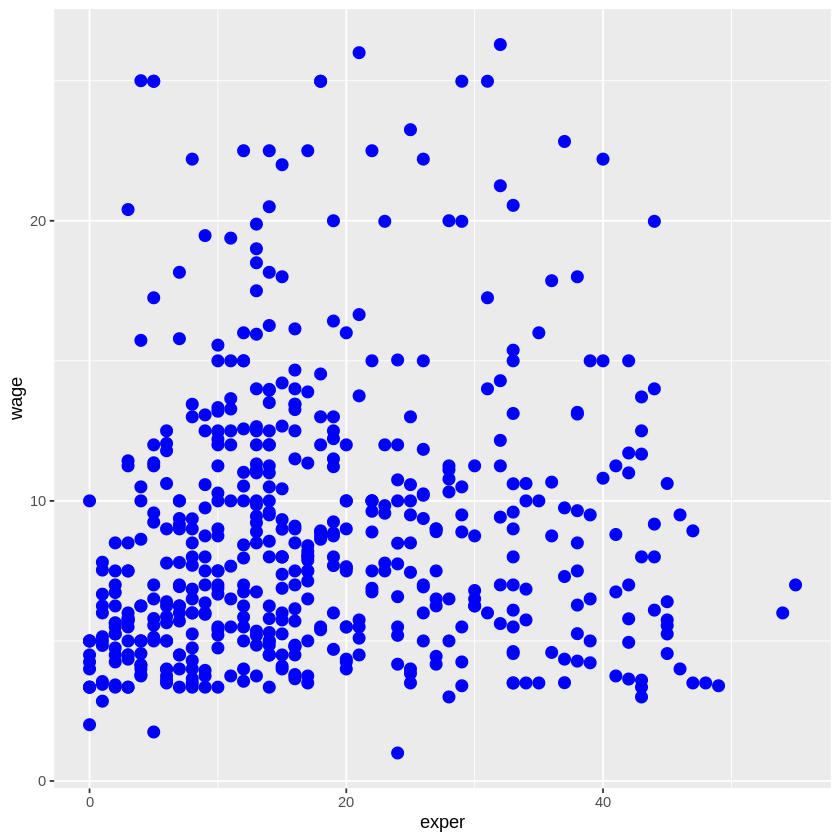

In [20]:
# Увеличение размеров точек и окрашивание их в синий цвет,
# сохранение полученного результата в виде объекта myplot2 и его отображение.
myplot2 <- myplot + geom_point(size = 3, color = "blue")
myplot2

`geom_smooth()` using formula = 'y ~ x'


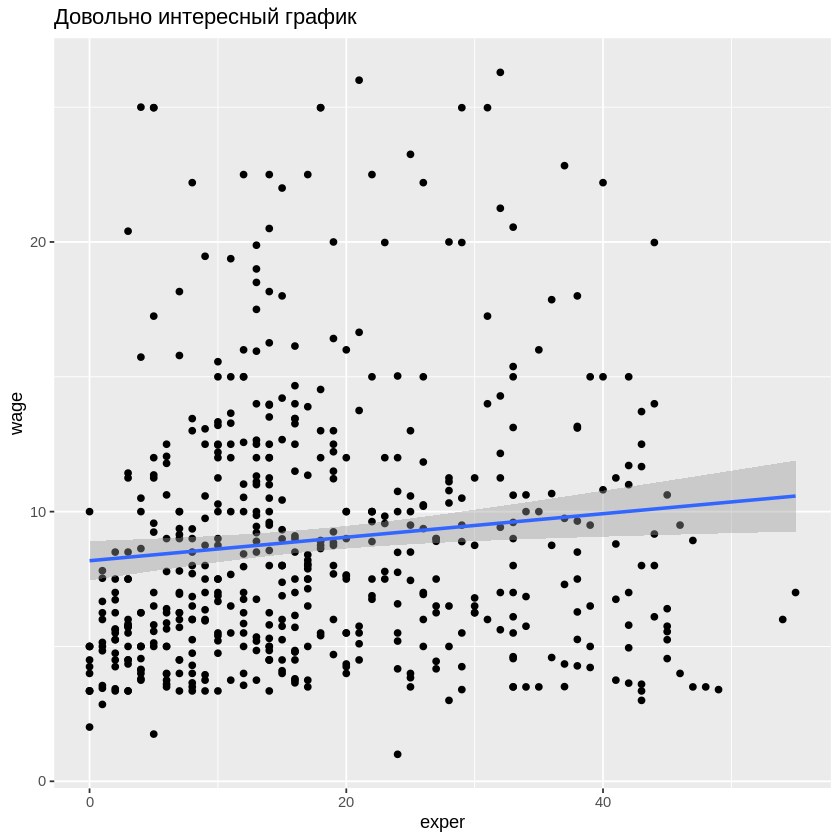

In [21]:
# Отображение диаграммы myplot с дополнительной
# аппроксимирующей линией тренда и заголовком.
myplot + geom_smooth(method = "lm") +
  labs(title = "Довольно интересный график")

### Сохранение диаграмм
* Диаграммы, созданные средствами ggplot2, можно сохранять, используя графический интерфейс RStudio или свой программный код. Чтобы сохранить график с помощью меню RStudio, перейдите на вкладку Plots (Диаграммы) и распахните раскрывающийся список Export (Экспорт).
* Диаграммы также можно сохранять программно, с помощью функции `ggsave()`. Функции можно передать объект диаграммы, ее размер и формат, а также путь к месту для его сохранения. Например:
```
ggsave(file="mygraph.png", plot=myplot, width=5, height=4)
```
Этот вызов сохранит myplot в формате PNG размером 5"×4"
в файл с именем mygraph.png в текущем рабочем каталоге. При желании диаграмму можно сохранить в другом формате, изменив расширение файла. В таблице перечислены некоторые наиболее часто используемые форматы:
\begin{array}{r|l}
Раширение&Формат\\\hline
*.pdf&Portable~Document~Format~(переносимый~формат~документов)\\
*.jpeg&JPEG~(Joint~Photographic~Experts~Group)\\
*.tiff&Tagged~Image~File~Format~(формат~файлов~изображений~с~признаками)\\
*.png&Portable~Network~Graphics~(переносимая~сетевая~графика)\\
*.svg&Scalable~Vector~Graphics~(масштабируемая~векторная~графика)\\
*.wmf&Windows~Metafile~(метафайл~среды~Windows)
\end{array}

Форматы PDF, SVG и WMF являются векторными форматами –
они могут изменять размеры без появления эффектов размытости или пикселизации. Другие форматы являются растровыми изображениями – при изменении их размера проявляется эффект пикселизации. Особенно это заметно при увеличении маленьких изображений. Формат PNG широко используется для изображений, отображаемых в веб-страницах. Форматы JPEG и TIF обычно используются для фотографий.

Формат WMF рекомендуется для диаграмм, которые будут ото-
бражаться в документах Microsoft Word или PowerPoint. MS Office не поддерживает файлы PDF или SVG, а формат WMF хорошо масштабируется. Однако формат WMF не поддерживает настройки прозрачности.
Если опустить параметр `plot=`, то будет сохранен последний созданный график. Следующий код сохраняет график на диск в виде документа PDF:
```
ggplot(data=mtcars, aes(x=mpg)) + geom_histogram()
ggsave(file="mygraph.pdf")
```
Дополнительные подробности ищите в справке `help(ggsave)`.

`geom_smooth()` using formula = 'y ~ x'


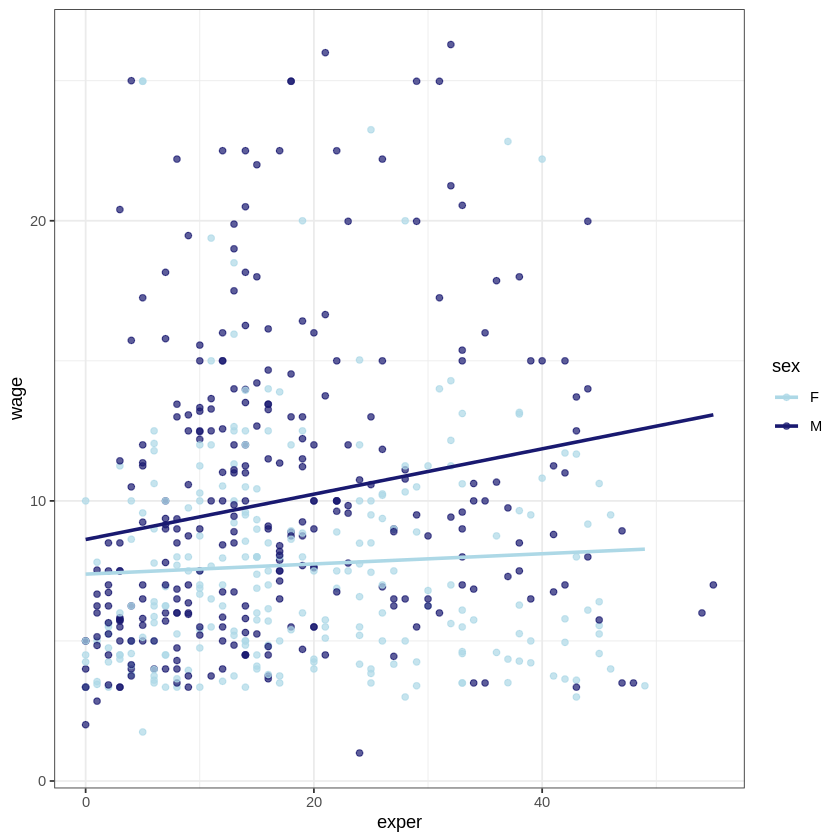

In [22]:
myplot3 <- ggplot(CPS85_01, aes(x = exper, y = wage, color = sex)) +
geom_point(alpha = .7, size = 1.5) +
geom_smooth(method = "lm", se = FALSE, size = 1) +
scale_color_manual(values = c("lightblue", "midnightblue")) +
theme_bw()
myplot3

In [23]:
ggsave(file="mygraph.png", plot=myplot3, width=10, height=8)

`geom_smooth()` using formula = 'y ~ x'


In [24]:
ggsave(file="mygraph.pdf", plot=myplot3, width=10, height=8)

`geom_smooth()` using formula = 'y ~ x'


In [25]:
ggsave(file="mygraph.jpeg", plot=myplot3, width=10, height=8)

`geom_smooth()` using formula = 'y ~ x'


In [30]:
ggsave(file="mygraph.tiff", plot=myplot3, width=10, height=8)

`geom_smooth()` using formula = 'y ~ x'


In [27]:
ggsave(file="mygraph.svg", plot=myplot3, width=10, height=8)

`geom_smooth()` using formula = 'y ~ x'


In [28]:
ggsave(file="mygraph.wmf", plot=myplot3, width=10, height=8)

ERROR: Error: 'win.metafile' is not an exported object from 'namespace:grDevices'
